In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report

In [3]:
y=[0,0,0,1,1,0,0]
yhat=[0,0,0,0,1,1,1]

In [4]:
print(classification_report(y,yhat))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [5]:
# 농구 게임 데이터 -> 포지션 예상 모델 생성
# 임의의 게임 성적 데이터 ---> 입력 ---> 예상 포지션 출력

In [6]:
df=pd.read_csv('f:/data/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [7]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [8]:
df.Pos.unique()

array(['SG', 'C'], dtype=object)

In [9]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


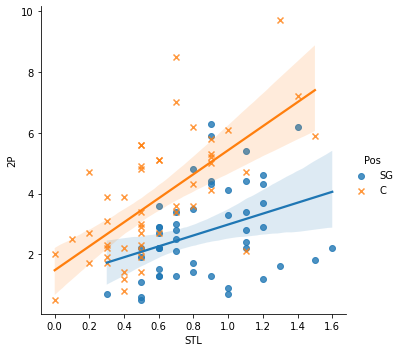

In [10]:
sns.lmplot('STL', '2P', data=df, fit_reg=True,
hue='Pos', markers=['o','x'])
# fit_reg = 회귀선 출력 여부
# linear model plot

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


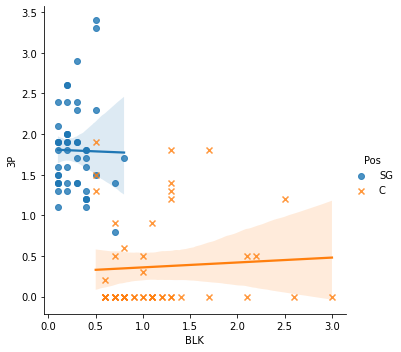

In [11]:
sns.lmplot('BLK', '3P', data=df, fit_reg=True,
hue='Pos', markers=['o','x'])

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


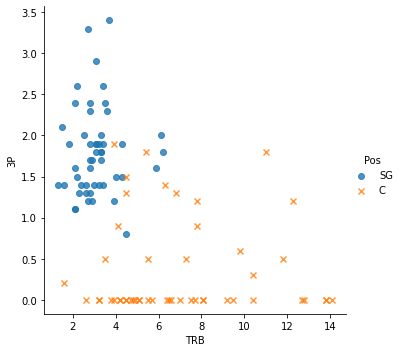

In [12]:
sns.lmplot('TRB', '3P', data=df, fit_reg=False,
hue='Pos', markers=['o','x'])

In [13]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [14]:
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(df, test_size=0.2)

In [17]:
test.shape
train.shape

(80, 5)

In [18]:
import pickle

In [19]:
# 파일로 저장
with open('basketball_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)

In [20]:
with open('basketball_test.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)

In [21]:
with open('basketball_train.pkl', 'rb') as train_data:
    mytrain=pickle.load(train_data)

In [22]:
with open('basketball_test.pkl', 'rb') as test_data:
    mytest=pickle.load(test_data)

In [23]:
mytest

,Player,Pos,3P,TRB,BLK
18,DeMarcus Cousins,C,1.8,11.0,1.3
22,Troy Daniels,SG,2.1,1.5,0.1
83,Jason Smith,C,0.5,3.5,0.7
3,Chris Andersen,C,0.0,2.6,0.6
35,Marcin Gortat,C,0.0,10.4,0.7
92,Myles Turner,C,0.5,7.3,2.1
93,Jonas Valanciunas,C,0.0,9.5,0.8
95,Nikola Vucevic,C,0.3,10.4,1.0
26,Wayne Ellington,SG,2.4,2.1,0.1
96,Dwyane Wade,SG,0.8,4.5,0.7


In [ ]:
# knn 알고리즘 : 최적의 k값?
# validation data(검증 데이터)를 이용하여 가장 예측율이 높은 k를 찾는 것 
# sklearn의 cross_val_score함수를 이용하여 k값 검출

# 10개 fold. 1 fold를 검증용, 9 fold 트레이닝 데이터 사용
# k=3부터 시작해서 검증 결과 점수를 저장

In [24]:
# 최적의 k값 찾기(교차 검증)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [28]:
max_k_range=train.shape[0]//2 #40
k_list=[]
for i in range(3, max_k_range, 2):
    k_list.append(i)

In [29]:
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [34]:
cross_validation_scores=[]
x_train=mytrain[['3P', 'BLK', 'TRB']]
y_train=mytrain[['Pos']]

In [36]:
y_train

,Pos
51,C
32,SG
60,C
70,SG
44,C
...,...
80,SG
77,C
59,SG
57,C


In [50]:
knn=KNeighborsClassifier(n_neighbors=3)

In [51]:
# cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
scores=cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
scores.mean() # k가 3일때 모델의 정확도(validation data에 대한)

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py:442: UserWarning: X 

0.9

In [ ]:
#cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean()) #k가 3일때 모델의 정확도(validation data에 대한)

In [ ]:
#cross_validation_scores
#plt.plot(k_list, cross_validation_scores)

In [ ]:
max(cross_validation_scores)

In [ ]:
b=k_list[cross_validation_scores.index(max(cross_validation_scores))]

In [ ]:
print("The best number of k : "+ str(b))

In [ ]:
#최적의 k값 9로 knn 모델 생성하여 테스트 데이터를 입력

In [ ]:
knn=KNeighborsClassifier(n_neighbors=b)

In [ ]:
x_train=train[['3P', 'BLK']]
y_train=train[['Pos']]

In [ ]:
#모델 생성
knn.fit(x_train, y_train.values.ravel())

In [ ]:
x_test=test[['3P', 'BLK']]
y_test=test[['Pos']]

In [ ]:
pred=knn.predict(x_test)

In [ ]:
pred #예측된 포지션

In [ ]:
y_test.values.ravel()

In [ ]:
res=pd.DataFrame({"예측":pred, "실제":y_test.values.ravel()})

In [ ]:
res
#정확도 : 100%

In [ ]:
print('정확도 :', round(sum(res['예측'] == res['실제']) / len(res)) * 100, '%')


In [ ]:
"정확도 : {0}%".format((res['예측'] == res['실제']).sum()/len(res)*100)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(pred,y_test.values.ravel())

In [ ]:
print("정확도 : ")

In [ ]:
####### 3P, BLK => Pos 예측 모델 생성 했음 ########

## 11시 ~ 11시 30분까지 모델 완성해보세요!
####### 3P, BLK, TRB => Pos 예측 모델 생성하고 정확도까지 출력  ########
###random_state=928로 설정

In [1]:
#의사결정트리를 이용한 타이타닉 생존자 예측 모델 

In [31]:
import numpy as np
import pandas as pd

In [32]:
train=pd.read_csv('f:/data/titanic/train.csv')
test=pd.read_csv('f:/data/titanic/test.csv')

In [33]:
train['Age_mean']=train['Age']
test['Age_mean']=test['Age']

In [34]:
train['Age_mean'].fillna(train['Age'].mean(), inplace=True)
test['Age_mean'].fillna(test['Age'].mean(), inplace=True)

In [35]:
train['Age_mean'].isnull().sum()
test['Age_mean'].isnull().sum()

0

In [36]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
train['Gender']= (train['Sex']=='female')
test['Gender']= (test['Sex']=='female')

In [38]:
train['Embarked'].isnull().sum()
test['Embarked'].isnull().sum()

0

In [39]:
train['Embarked_S']=train['Embarked']=='S'
train['Embarked_C']=train['Embarked']=='C'
train['Embarked_Q']=train['Embarked']=='Q'

In [40]:
test['Embarked_S']=test['Embarked']=='S'
test['Embarked_C']=test['Embarked']=='C'
test['Embarked_Q']=test['Embarked']=='Q'

In [41]:
train['FamilySize']=train['SibSp']+train['Parch']+1
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [42]:
train['Family']=train['FamilySize']

In [43]:
train.loc[train['FamilySize']==1, 'Family'] = 'S'
train.loc[(train['FamilySize']>1) & (train['FamilySize']<=4), 'Family']='M'
train.loc[train['FamilySize']>4, 'Family'] = 'L'

In [44]:
train[['Family', 'FamilySize']]

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1
...,...,...
886,S,1
887,S,1
888,M,4
889,S,1


In [45]:
train['Family_S']=train['Family']=='S'
train['Family_M']=train['Family']=='M'
train['Family_L']=train['Family']=='L'

In [46]:
test['FamilySize']=test['SibSp']+test['Parch']+1
test['Family']=test['FamilySize']
test.loc[test['FamilySize']==1, 'Family'] = 'S'
test.loc[(test['FamilySize']>1) & (test['FamilySize']<=4), 'Family']='M'
test.loc[test['FamilySize']>4, 'Family'] = 'L'
test['Family_S']=test['Family']=='S'
test['Family_M']=test['Family']=='M'
test['Family_L']=test['Family']=='L'

In [47]:
train['Pclass']=train['Pclass'].astype('category')

In [48]:
fn=['Gender', 'Age_mean', 
                 'Embarked_S', 'Embarked_C', 'Embarked_Q', 
                 'Family_S', 'Family_M', 'Family_L']


In [49]:
xtrain=train[fn]
xtrain.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L
0,False,22.0,True,False,False,False,True,False
1,True,38.0,False,True,False,False,True,False
2,True,26.0,True,False,False,True,False,False
3,True,35.0,True,False,False,False,True,False
4,False,35.0,True,False,False,True,False,False


In [50]:
ylabel=train['Survived']

In [52]:
xtest=test[fn]
xtest

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L
0,False,34.50000,False,False,True,True,False,False
1,True,47.00000,True,False,False,False,True,False
2,False,62.00000,False,False,True,True,False,False
3,False,27.00000,True,False,False,True,False,False
4,True,22.00000,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...
413,False,30.27259,True,False,False,True,False,False
414,True,39.00000,False,True,False,True,False,False
415,False,38.50000,True,False,False,True,False,False
416,False,30.27259,True,False,False,True,False,False


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model=DecisionTreeClassifier(max_depth=3, random_state=928)
model

DecisionTreeClassifier(max_depth=3, random_state=928)

In [56]:
model.fit(xtrain,ylabel) # 모델 완성

DecisionTreeClassifier(max_depth=3, random_state=928)

In [58]:
pred=model.predict(xtest)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
test['Survived']=pred
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Gender,Embarked_S,Embarked_C,Embarked_Q,FamilySize,Family,Family_S,Family_M,Family_L,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,False,False,False,True,1,S,True,False,False,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,True,True,False,False,2,M,False,True,False,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,False,False,False,True,1,S,True,False,False,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,False,True,False,False,1,S,True,False,False,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,True,True,False,False,3,M,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,False,True,False,False,1,S,True,False,False,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,True,False,True,False,1,S,True,False,False,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,False,True,False,False,1,S,True,False,False,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,False,True,False,False,1,S,True,False,False,0


In [63]:
sub=test[['PassengerId', 'Survived']]
sub.to_csv('titanic_submit.csv', index=False)

In [65]:
# 의사결정트리 교차검증 코드 형식 
from sklearn.model_selection import KFold

In [66]:
kfold=KFold(n_splits=10, shuffle=True, random_state=928)

In [71]:
model=DecisionTreeClassifier(max_depth=3, random_state=928)
model.fit(xtrain, ylabel)
score=cross_val_score(model, xtrain, ylabel, cv=kfold, scoring='accuracy')
score

NameError: name 'cross_val_score' is not defined

In [ ]:
# 파라미터 튜닝 
# 1. max_depth : 트리 최대 깊이
# 2. max_lead_nodes : 몇개 안남은 경우 더 내려가지 않도록 함.
# 3. min_sample_leaf : leaf 가 되기 위해서 최소로 필요한 데이터 개수